In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [3]:
df.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In this data we have only one year and it's 2014 

The Brands:  is the model of the Cars 

VEHICLECLASS : the type of the car 

ENGINESIZE : حجم المحرك

CYLINDERS : الاسطوانات 

TRANSMISSION : الانتقال في العربيه 

FUELTYPE : نوع الوقود 

FUELCONSUMPTION_CITY : الوقود 

FUELCONSUMPTION_HWY , FUELCONSUMPTION_COMB , FUELCONSUMPTION_COMB_MPG

CO2EMISSIONS  : what we need to predict 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


In [19]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [20]:
df.isnull().sum()

MODELYEAR                   0
Brands                      0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

# How many model year in 2014 ? 

In [21]:
df["MODELYEAR"].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

 # How many Brands do we have ?

In [22]:
df["Brands"].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: Brands, dtype: int64

# First 10 model we have 

In [23]:
Max_10_value =df["Brands"].value_counts().head(10).sort_values()

In [24]:
Max_10_value

DODGE            39
VOLKSWAGEN       42
PORSCHE          44
GMC              49
AUDI             49
TOYOTA           49
MERCEDES-BENZ    59
BMW              64
CHEVROLET        86
FORD             90
Name: Brands, dtype: int64

----------------------------------

We see that the FORD is the maximam and DODGE is the minimam

------------------------------

# Show the chart of the model 

<AxesSubplot:xlabel='Brands', ylabel='count'>

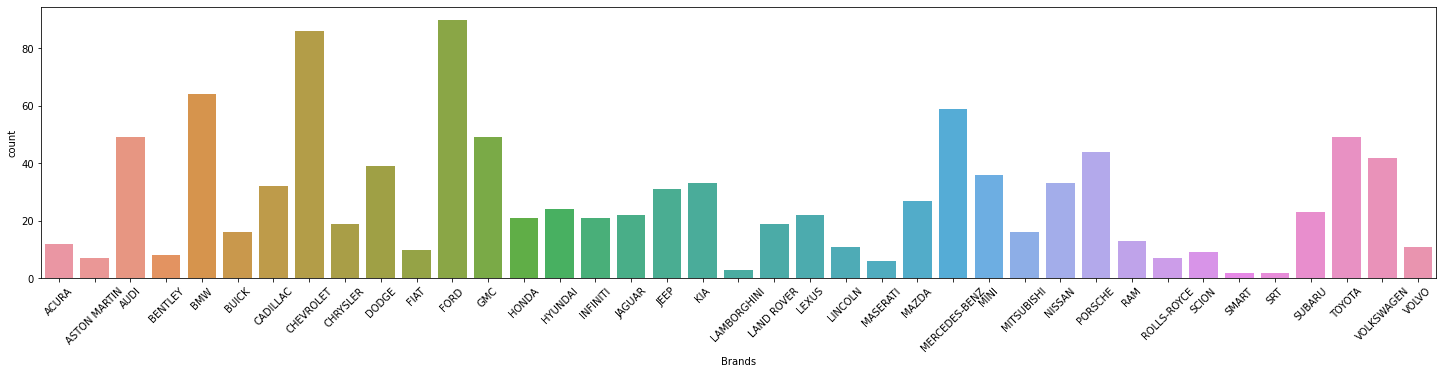

In [25]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.countplot(x=df['Brands'])

In [26]:
df["VEHICLECLASS"].value_counts()

MID_SIZE                   178
COMPACT                    172
SUV_SMALL                  154
SUV_STANDARD               110
FULL_SIZE                   86
TWO-SEATER                  71
SUBCOMPACT                  65
PICKUP TRUCK_STANDARD       62
MINICOMPACT                 47
STATION_WAGON_SMALL         36
VAN_PASSENGER               25
VAN_CARGO                   22
MINIVAN                     14
PICKUP_TRUCK_SMALL          12
SPECIAL_PURPOSE_VEHICLE      7
STATION_WAGON_MID_SIZE       6
Name: VEHICLECLASS, dtype: int64

# Minimam  and Maximam 10 Vical with the ENGINESIZE have the effict in Co2 

In [27]:
df.groupby('ENGINESIZE').mean().head(10)

,MODELYEAR,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,,,,,,,
1.0,2014.0,3.333333,7.100000,5.633333,6.466667,43.666667,148.666667
1.2,2014.0,3.500000,7.175000,5.750000,6.550000,43.250000,150.750000
1.3,2014.0,4.000000,6.600000,5.700000,6.200000,46.000000,143.000000
1.4,2014.0,4.000000,8.800000,6.660000,7.836667,36.400000,180.200000
1.5,2014.0,4.000000,7.758333,6.300000,7.091667,40.916667,163.083333
1.6,2014.0,4.000000,9.272308,7.070769,8.289231,34.169231,190.630769
1.8,2014.0,4.000000,8.843243,6.608108,7.843243,36.648649,180.459459
2.0,2014.0,4.000000,10.293671,7.460127,9.025949,31.981013,207.170886
2.1,2014.0,4.000000,9.050000,6.400000,7.850000,36.000000,212.000000


In [28]:
df.groupby('ENGINESIZE').mean().tail(10)

,MODELYEAR,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,,,,,,,
5.9,2014.0,12.000000,18.000000,12.600000,15.600000,18.000000,359.000000
6.0,2014.0,9.428571,23.042857,15.185714,19.507143,15.071429,397.214286
6.2,2014.0,8.000000,18.406250,12.746875,15.856250,18.218750,346.218750
6.3,2014.0,12.000000,18.200000,12.600000,15.700000,18.000000,361.000000
6.4,2014.0,8.000000,17.080000,10.780000,14.220000,19.600000,326.800000
6.5,2014.0,12.000000,22.800000,12.900000,18.300000,15.000000,421.000000
6.6,2014.0,12.000000,18.966667,12.133333,15.866667,18.000000,365.000000
6.7,2014.0,12.000000,20.700000,12.750000,17.100000,17.000000,393.000000
6.8,2014.0,9.000000,23.100000,16.350000,20.100000,14.000000,462.500000


------------------------------------------------------
If the Engine size is small that effect Co2 less 

 and when it get biger it effect more
 
and the Fuelcosumption_City be more 

------------------------------------------------------

In [29]:
df.groupby('FUELTYPE').mean()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
FUELTYPE,,,,,,,,
D,2014.0,2.525926,5.037037,9.755556,6.796296,8.437037,34.629630,227.777778
E,2014.0,4.441304,6.934783,20.864130,14.918478,18.194565,16.108696,291.086957
X,2014.0,2.954475,5.161479,11.937160,8.694942,10.482490,28.770428,241.097276
Z,2014.0,3.629263,6.350230,13.522581,9.410599,11.675346,25.364055,268.529954


---------------------------------------------------

Thats show the type D is Min effect in CO2 

and the type E is Max effect in CO2 

----------------------------------------------------

<AxesSubplot:xlabel='FUELTYPE', ylabel='count'>

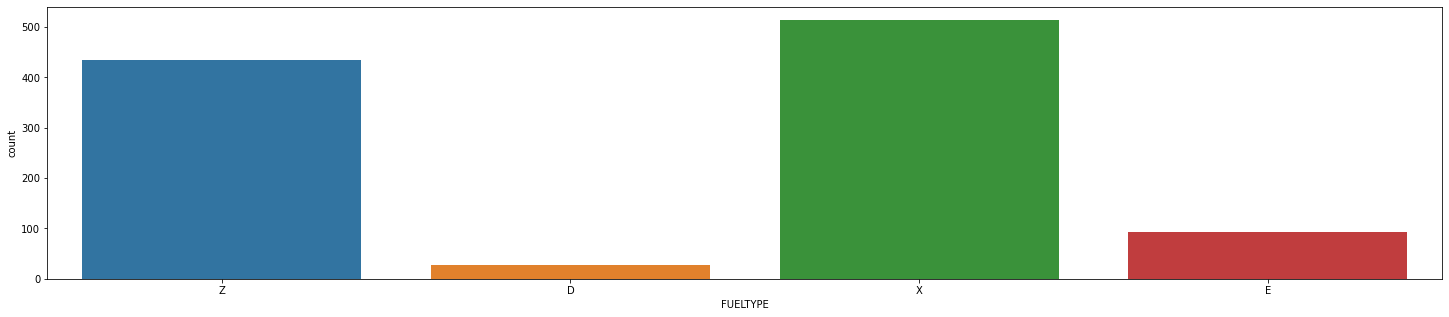

In [30]:
plt.figure(figsize=(25,5))

sns.countplot(x=df['FUELTYPE'])

In [31]:
 df.groupby('FUELTYPE').mean()["CO2EMISSIONS"].sort_values()

FUELTYPE
D    227.777778
X    241.097276
Z    268.529954
E    291.086957
Name: CO2EMISSIONS, dtype: float64

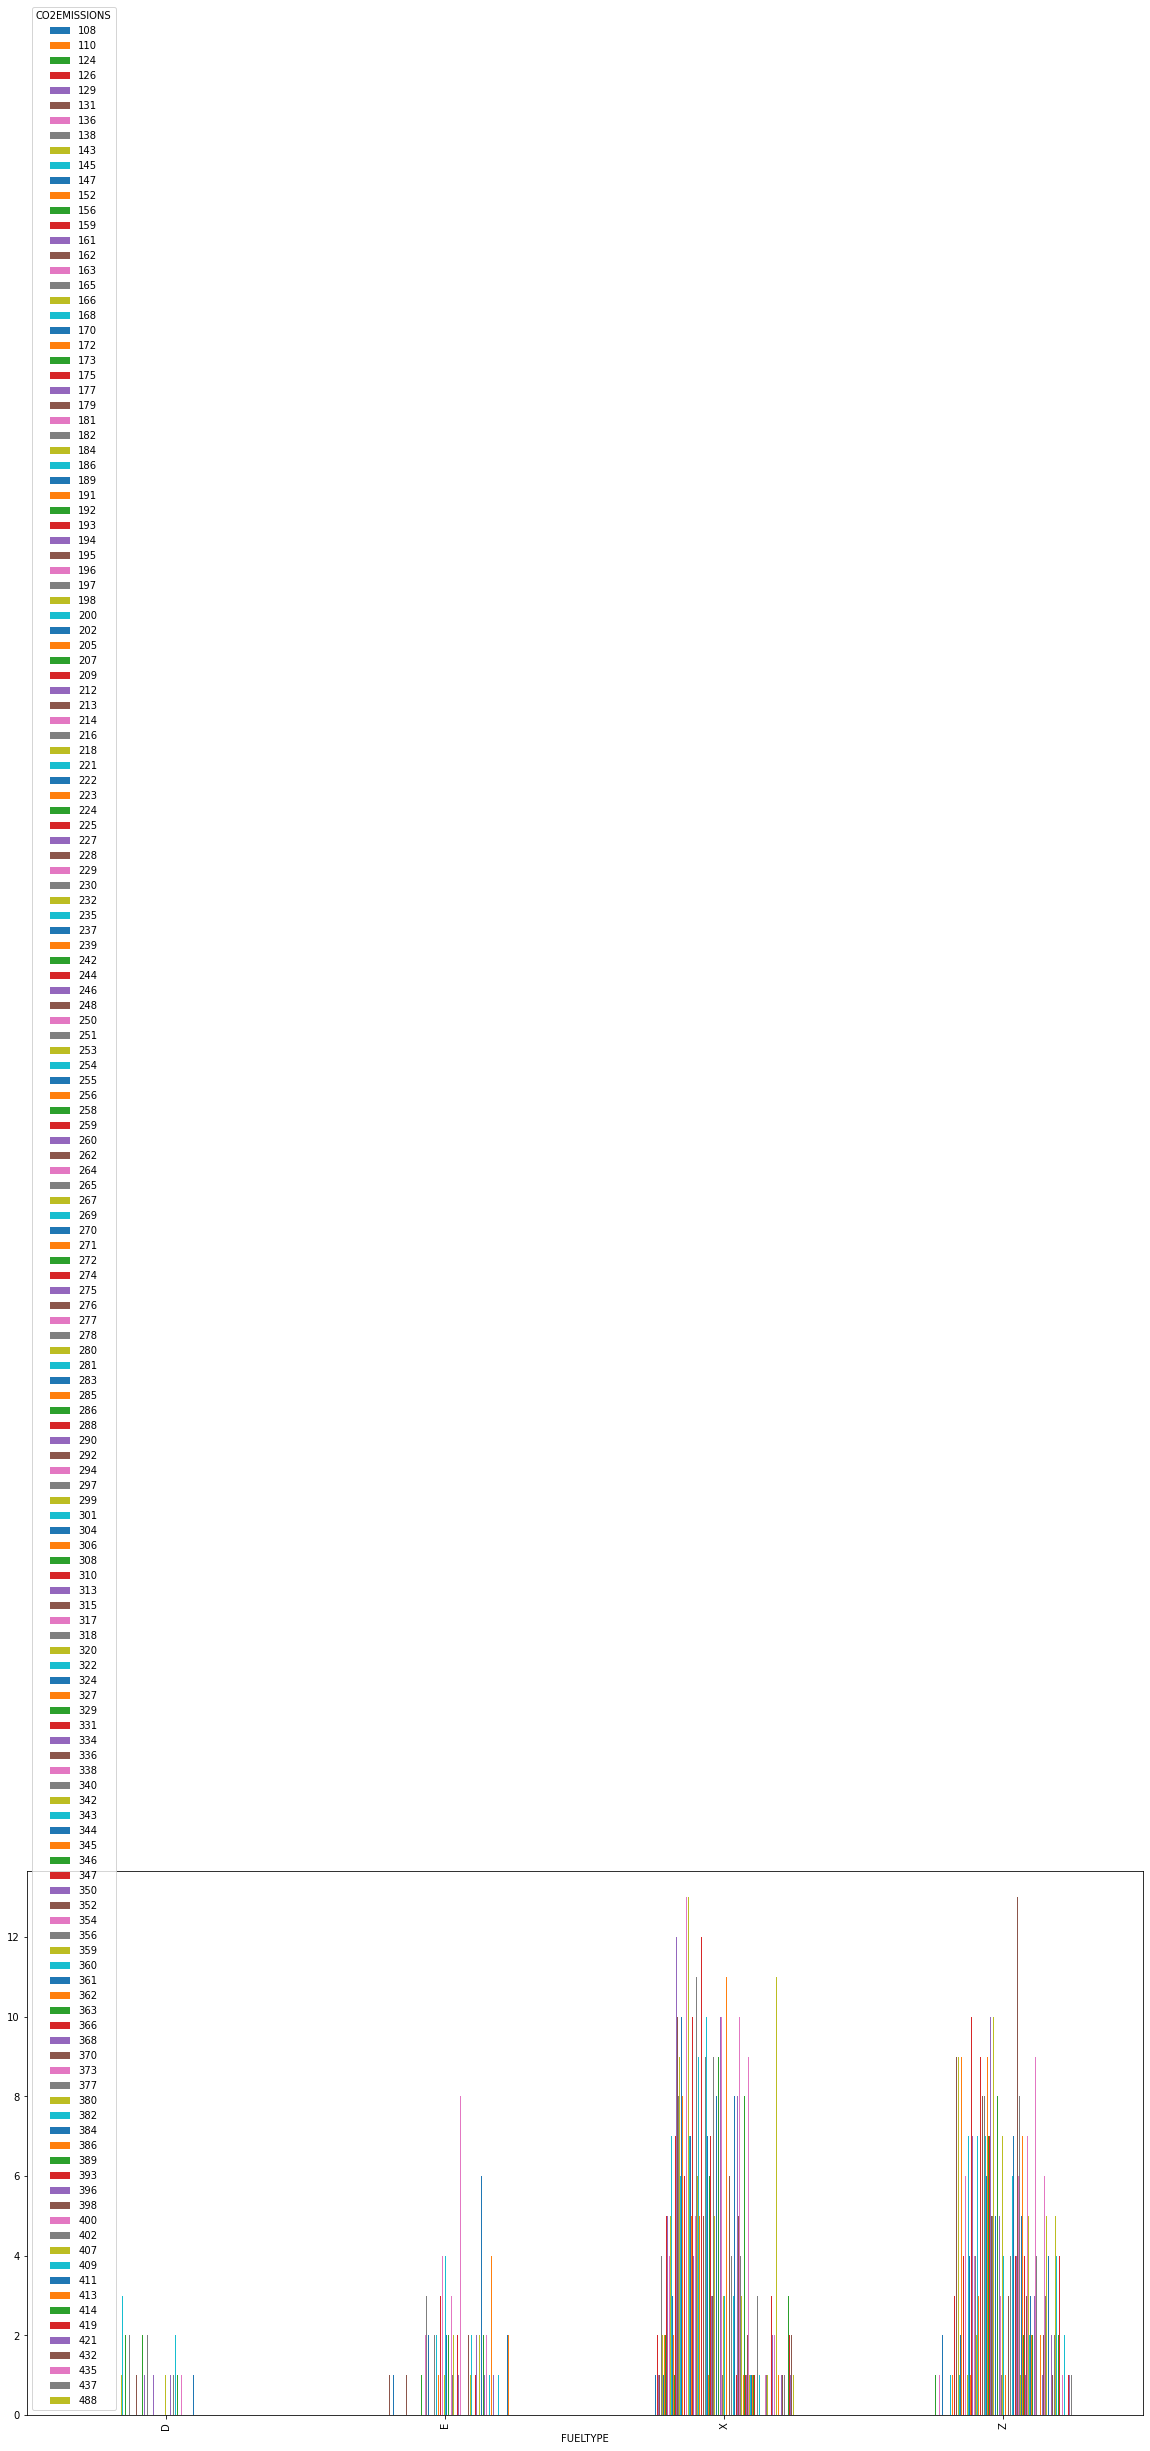

In [32]:
df.groupby("FUELTYPE")["CO2EMISSIONS"].value_counts().sort_values().unstack().plot(kind="bar" ,figsize=(20,10)) ;

-------------------------

In this visual we see that the Type Z have more value in Co2 

-----------------------------

In [33]:
df["TRANSMISSION"].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64

--------------------------

It se we have  20 of TRANSMISSION

and the max is A6 

and the min is A24

---------------------------------

<AxesSubplot:xlabel='TRANSMISSION', ylabel='count'>

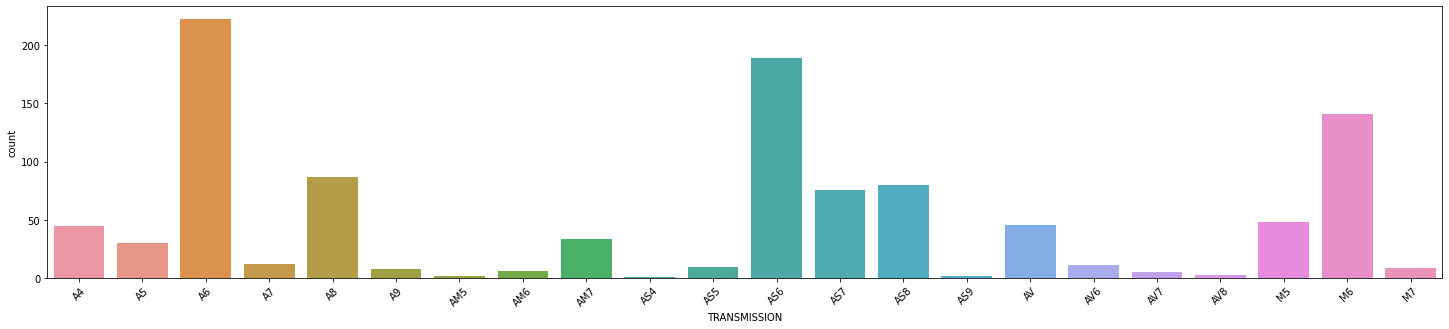

In [34]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.countplot(x=df['TRANSMISSION'].sort_values())

In [35]:
df["CYLINDERS"].value_counts().sort_values()

3       4
10      9
5       9
12     17
8     252
6     356
4     420
Name: CYLINDERS, dtype: int64

------------------------------------
In CYLINDERS 

it show that is type 3 have the last CYLINDERS 

and the type 4 have the max CYLINDERS

it's meaning that the Co2 is more in type 4 

--------------------------------

In [36]:
df.groupby('CYLINDERS').mean()

,MODELYEAR,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
CYLINDERS,,,,,,,
3,2014.0,1.100000,6.800000,5.600000,6.300000,44.750000,144.750000
4,2014.0,1.978095,9.881905,7.342381,8.744048,33.071429,201.107143
5,2014.0,2.500000,11.200000,7.966667,9.744444,29.000000,223.888889
6,2014.0,3.462360,13.597191,9.597472,11.799157,24.558989,260.603933
8,2014.0,5.231349,18.071032,12.635714,15.631349,18.630952,331.869048
10,2014.0,6.088889,20.255556,13.366667,17.166667,16.555556,394.777778
12,2014.0,6.300000,19.541176,12.370588,16.311765,17.411765,375.176471


----------------------------

IT show type 12 is have more effect in CO2 

thats meaning type 12 have just 17 but still have more effective 

and type 4 have 420 and don't have more effective

----------------------

In [37]:
df["Brands"].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [38]:
df.groupby("Brands")["VEHICLECLASS"].value_counts()

Brands        VEHICLECLASS
ACURA         COMPACT         6
              MID_SIZE        4
              SUV_SMALL       2
ASTON MARTIN  TWO-SEATER      4
              MINICOMPACT     2
                             ..
VOLKSWAGEN    MINIVAN         1
VOLVO         SUV_SMALL       5
              COMPACT         3
              MID_SIZE        2
              SUV_STANDARD    1
Name: VEHICLECLASS, Length: 187, dtype: int64

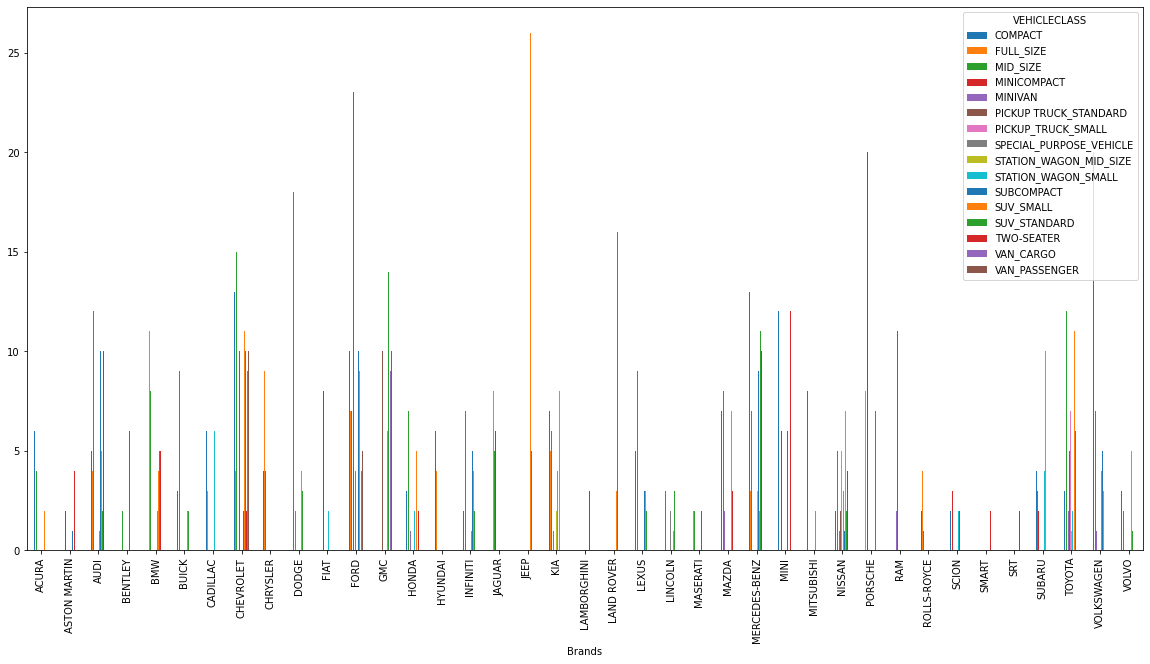

In [39]:
df.groupby("Brands")["VEHICLECLASS"].value_counts().sort_values().unstack().plot(kind="bar" ,figsize=(20,10)) ;

In [40]:
M= df.groupby("Brands")["VEHICLECLASS"].value_counts().sort_values()

In [41]:
data = pd.DataFrame({"Count" : M})

In [42]:
data

Count
Brands      VEHICLECLASS                  
VOLVO       SUV_STANDARD                 1
ROLLS-ROYCE MID_SIZE                     1
NISSAN      SUBCOMPACT                   1
            SPECIAL_PURPOSE_VEHICLE      1
            MINIVAN                      1
...                                    ...
VOLKSWAGEN  COMPACT                     20
PORSCHE     MINICOMPACT                 20
FORD        PICKUP TRUCK_STANDARD       23
BMW         COMPACT                     26
JEEP        SUV_SMALL                   26

[187 rows x 1 columns]

In [29]:
data.head(10)

Count
Brands        VEHICLECLASS                  
VOLVO         SUV_STANDARD                 1
ROLLS-ROYCE   MID_SIZE                     1
NISSAN        SUBCOMPACT                   1
              SPECIAL_PURPOSE_VEHICLE      1
              MINIVAN                      1
TOYOTA        STATION_WAGON_MID_SIZE       1
HONDA         MINIVAN                      1
INFINITI      STATION_WAGON_SMALL          1
MERCEDES-BENZ STATION_WAGON_SMALL          1
AUDI          STATION_WAGON_SMALL          1

In [30]:
data.tail(10)

,,Count
Brands,VEHICLECLASS,
MERCEDES-BENZ,COMPACT,13
GMC,SUV_STANDARD,14
CHEVROLET,MID_SIZE,15
LAND ROVER,SUV_STANDARD,16
DODGE,MID_SIZE,18
VOLKSWAGEN,COMPACT,20
PORSCHE,MINICOMPACT,20
FORD,PICKUP TRUCK_STANDARD,23
BMW,COMPACT,26


In [31]:
df.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [32]:
df.drop(['Brands', 'VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis=1,inplace=True)

In [33]:
df.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244


# Model 

In [3]:
X=df.iloc[:,:-1].values
y=df.iloc[:,7].values

In [4]:
y.shape

(1067,)

In [5]:
y=y.reshape(1067,1)

In [6]:
y.reshape(1067,1).shape

(1067, 1)

In [7]:
y

array([[ 9.9],
       [11.2],
       [ 6. ],
       ...,
       [13.4],
       [12.9],
       [14.9]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train, validation, test = np.split(df.sample(frac=1), [int(.6*len(df)),
int(.8*len(df))])

Assign the train split

In [10]:
X_train = train[[train.columns[i] for i in range(train.shape[1]-1) ]]
y_train = train[train.columns[-1]]

Assign the test split

In [11]:
X_test = test[[test.columns[i] for i in range(train.shape[1]-1) ]]
y_test = test[test.columns[-1]]

Assign the validation split

In [12]:
X_val = validation[[validation.columns[i] for i in 
                    range(validation.shape[1]-1) ]]
y_val = validation[validation.columns[-1]]

Print the sets data shapes

In [13]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (640, 11)
X_test shape: (214, 11)
y_train shape: (640,)
y_test shape: (214,)
X_val shape: (213, 11)
y_val shape: (213,)


In [14]:
y_train=y_train.values.reshape(-1,1)

In [15]:
y_test=y_test.values.reshape(-1,1)

In [16]:
y_val=y_val.values.reshape(-1,1)

In [17]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (640, 11)
X_test shape: (214, 11)
y_train shape: (640, 1)
y_test shape: (214, 1)
X_val shape: (213, 11)
y_val shape: (213, 1)


## LinearRegression

## Training the Simple Linear Regression model on the Training set and Predict 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(X_train, y_train)
predictions = linear_model.predict(X_train)
mean_absolute_error(predictions, y_train)

ValueError: could not convert string to float: 'CHRYSLER'

## RandomForestRegressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=5).fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)
mean_absolute_error(rf_train_preds, y_train), mean_absolute_error(rf_test_preds, y_test)

C:\Users\AMIT\AppData\Local\Temp/ipykernel_2300/980744117.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=10, max_depth=5).fit(X_train, y_train)


(5.937628782266177, 6.558370433492694)

In [62]:
from sklearn import metrics 

accuracy = metrics.accuracy_score(y_test,y_pred)
print (f"the accuracy is : {100*accuracy:0.3}")

the accuracy is : 7.48


In [53]:
from sklearn.model_selection import cross_validate

In [54]:
model = RandomForestRegressor(n_estimators=1000, random_state=1, criterion='entropy', bootstrap=True, oob_score=True, verbose=1)
cv_dict = cross_validate(model, X, y, return_train_score=True)

C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\AMIT\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\AMIT\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\AMIT\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\AMIT\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "C:\Users\AMIT\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 572, in __init__
    self.results = batch()
  File "C:\Users\AMIT\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "C:\Users\AMIT\anaconda3\lib\site-packages\joblib\parallel.py", line 262, in <listcomp>
    return [func(*args, **kwargs)
  File "C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\utils\fixes.py", line 117, in __call__
    return self.function(*args, **kwargs)
  File "C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 189, in _parallel_build_trees
    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 394, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'entropy'


## LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
Loges = LogisticRegression()
Loges.fit(X_train,y_train)
y_pred = Loges.predict(X_test)

C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

In [57]:
logreg001

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [60]:
from sklearn import metrics 

accuracy = metrics.accuracy_score(y_test,y_pred)
print (f"the accuracy is : {100*accuracy:0.3}")

the accuracy is : 7.48


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
k_fold = KFold(n_splits = 10 , shuffle = True ,random_state=33)

In [46]:
# split the data to train and test 
from sklearn.model_selection import train_test_split

x=df.drop('CO2EMISSIONS',axis=1) 
y=df['CO2EMISSIONS']

x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.2,random_state=23)


In [47]:
#apply cross validation in the model 
score = cross_val_score(Loges,x,y,cv=k_fold,scoring='accuracy')

C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [48]:
print (f"the mean of accuracy after applying cross validation :{np.mean(score)}")

the mean of accuracy after applying cross validation :0.07883971080938106


## SVC 

In [49]:
y=y.values.reshape(-1,1)

In [50]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [51]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Try anther way 

In [52]:
y = y.reshape(len(y),1)

In [53]:
#Split the variables
X=df.iloc[:,:-1].values
y=df.iloc[:,7].values

In [54]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\AMIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [57]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score*100)

10.2803738317757


In [59]:
df.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244


In [60]:
t=regressor.predict(sc.transform([[2014,2,4,9,9,9,33]]))

In [61]:
t

array([-0.93925267])

## KNN 

In [62]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors = 13)

In [63]:
# using knn model without cross validation 
KNN.fit(X_train,y_train)
y_pred = KNN.predict (X_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
print (f"the accuracy is : {100*accuracy:0.3}")


the accuracy is : 28.0


## SVM 

In [64]:
from sklearn.svm import SVC

SVM = SVC()
scoring = 'accuracy'
score = cross_val_score(SVM, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

2.16

In [65]:
SVM.fit(x_train,y_train)
y_pred= SVM.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print (f"the accuracy is : {100*accuracy:0.3}")

the accuracy is : 2.34


# Third way

In [66]:
X=df.iloc[:,:-1].values
y=df.iloc[:,7].values

In [67]:
X

array([[2.014e+03, 2.000e+00, 4.000e+00, ..., 6.700e+00, 8.500e+00,
        3.300e+01],
       [2.014e+03, 2.400e+00, 4.000e+00, ..., 7.700e+00, 9.600e+00,
        2.900e+01],
       [2.014e+03, 1.500e+00, 4.000e+00, ..., 5.800e+00, 5.900e+00,
        4.800e+01],
       ...,
       [2.014e+03, 3.000e+00, 6.000e+00, ..., 9.800e+00, 1.180e+01,
        2.400e+01],
       [2.014e+03, 3.200e+00, 6.000e+00, ..., 9.300e+00, 1.130e+01,
        2.500e+01],
       [2.014e+03, 3.200e+00, 6.000e+00, ..., 1.020e+01, 1.280e+01,
        2.200e+01]])

In [68]:
y

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

In [69]:
len(y)

1067

In [70]:
len(X)

1067

In [71]:
y.shape

(1067,)

In [72]:
X.shape

(1067, 7)

In [117]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [119]:
model = LinearRegression()

In [120]:
model.fit(X_train,y_train)

LinearRegression()

In [125]:
y_pred = model.predict(X_test)

In [133]:
from sklearn.metrics import classification_report 

In [134]:
from sklearn.metrics import confusion_matrix

In [145]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='PuRd')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [147]:
cm = confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets